<a href="https://colab.research.google.com/github/LadyPary/DataMiningAssignments/blob/main/DM_HW3Part2_ZahraRabbany_610398124.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_______
# **<center> Data Mining </center>**
### **<center> Assignment No. 3 (Part 2)</center>**

#### <center>Zahra Rabbany Khorasgani</center> 
<center>610398124</center>

#### <center>Prof. Hedieh Sajedi</center>
#### <center>Department of Computer Science, Tehran University</center>

#### <center>May 2022</center>
_______



## **Importing**

In [ ]:
#!pip install fuzzy-c-means
#!pip install kneed
#!pip install -U scikit-fuzzy

In [ ]:
#Necessary packages
import numpy as np
import pandas as pd
from itertools import combinations

# for data mining
from sklearn.cluster import KMeans
from fcmeans import FCM #!pip install fcmeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

# for visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

#**Part 2: Clustering**

**Attribute Information:**

*   $(x, y)$ Points on a plane.


##**1. Methods and Models**

### **1.1. Load**

In [ ]:
# loading data and adding headers
df1 = pd.read_csv('https://raw.githubusercontent.com/LadyPary/DataMiningAssignments/main/HW3/first_clustering_dataset.csv',
                  names=["X", "Y"])
df2 = pd.read_csv('https://raw.githubusercontent.com/LadyPary/DataMiningAssignments/main/HW3/second_clustering_dataset.csv',
                  names=["X", "Y"])
df3 = pd.read_csv('https://raw.githubusercontent.com/LadyPary/DataMiningAssignments/main/HW3/third_clustering_dataset.csv',
                  names=["X", "Y"])

In [ ]:
df1.shape

(400, 2)

In [ ]:
df2.shape

(450, 2)

In [ ]:
df3.shape

(500, 2)

In [ ]:
df1.head()

,X,Y
0,-0.125391,-1.268829
1,0.062522,1.278778
2,-0.048762,0.200549
3,0.105585,-0.496629
4,0.011886,-0.739317


### **1.2. Scatter Plots**

In [ ]:
def drawScatter(dataset_number, df):
  print("Scatter plot for the {} dataset:".format(dataset_number))
  plt = sns.scatterplot(data=df, x="X", y="Y")
  return 

### **1.3. Lloyd's k-means Clustering**
Clusters are seperated by color and the centroids are the red dots.

k-means is a partitioning clustering algorithm and works well with spherical-shaped clusters.

There are various methods to find the ideal number of clusters in a data. One of them is to Use K-means algorithm along with Silhouette distance. 
Silhouette metric is a distance calculation algorithm using euclidean or Manhattan distance.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is $(b - a)/max(a, b)$. To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [ ]:
# k means
def doKmeans(k, df):
  for i in range(2, k+1):
    kmeans = KMeans(n_clusters=i, init='random', n_init = 200).fit(df)
    centroids = kmeans.cluster_centers_
    SSE = kmeans.inertia_
    labels = kmeans.labels_
    silhouette_avg = silhouette_avg = metrics.silhouette_score(df, labels)

    print("=====================================")
    print("========== Results for k={} ==========".format(i))
    print(" ")
    print("The centers are:", centroids)
    print(" ")
    print("The SEE is:", SSE)
    print(" ")
    print("The average silhouette_score is :", silhouette_avg)        
        
    plt.scatter(df['X'], df['Y'], c= labels.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    plt.show()
    print("=====================================")

  return
  # n_init: int, default=10
  # Number of time the k-means algorithm will be run with different centroid seeds. 
  # The final results will be the best output of n_init consecutive runs in terms of inertia.

#### **1.3.1. K-Means Elbow Method**

The Elbow method is a very popular technique and the idea is to run k-means clustering for a range of clusters k (let’s say from 1 to 15) and for each value, we are calculating the sum of squared distances from each point to its assigned center(distortions).

When the distortions are plotted and the plot looks like an arm then the “elbow”(the point of inflection on the curve) is the best value of k.



In [ ]:
# Elbow Method
def findElbow(df):
  minimum_SSE = []
  for k in range(1, 15+1):
    kmeans = KMeans(n_clusters=k, init='random', n_init = 200).fit(df)
    centroids = kmeans.cluster_centers_
    SSE = kmeans.inertia_
    minimum_SSE.append(SSE)
  return minimum_SSE

def plotElbow(SSEs):
  #finding and ploting the elbow point
  knee = KneeLocator(range(1, 15+1), SSEs, S=1, curve='convex', direction='decreasing', interp_method="interp1d", online=True)
  fig = plt.figure(figsize=(5, 5))
  knee.plot_knee()
  plt.xticks(np.arange(1, 15+1, step=1))
  plt.xlabel('Number of clusters (k)')
  plt.ylabel('SSE')
  plt.title('The Elbow Method showing the optimal k')
  print("Elbow point:", knee.knee)
  print("SSE for this point is: ", SSEs[knee.knee])
  plt.show()

  return

### **1.4. Fuzzy C-Means Clustering**

"fuzzy” here means “not sure”, which indicates that it’s a soft clustering method. “C-means” means c cluster centers, which only replaces the “K” in “K-means” with a “C” to make it look different.

In a clustering algorithm, if the probability of one data point belonging to a cluster can only take the value of 1 or 0, it’s hard clustering. The boundary of a cluster in a hard clustering method can be visualized as a crisp boundary. On the contrary, in a soft clustering method, the probability of one data point belonging to a cluster can take any value between 0 and 1, such as 75%, for which the boundary of a cluster can be visualized as a fuzzy boundary.


**The fuzzy partition coefficient (PC):**
The FPC is defined on the range from 0 to 1, with 1 being best. It is a metric which tells us how cleanly our data is described by a certain model. 

**The partition entropy (PEC):**
Measures the fuzzy degree of final divided clusters by means of the fuzzy partition matrix, and the smaller its value, the better the partition result

In [ ]:
def doFuzzy(df, num_of_clusters, membership_cutoff, n_jobs):
  best_fuzzy = []
  max_pc = -1
  best_pec = 0

  for job in range(n_jobs):
    # fuzzy c-means 
    df_nparray = df.to_numpy(copy=True)
    k = num_of_clusters

    fuzzy_c = FCM(n_clusters=k)
    #m (float): Degree of fuzziness: $m \in (1, \infty)$.

    fuzzy_c.fit(df_nparray)
    centroids = fuzzy_c.centers
    fcm_labels_soft = fuzzy_c.soft_predict(df_nparray) 
    fcm_labels = fuzzy_c.predict(df_nparray) 
    #  Returns:
    #    NDArray: Fuzzy partition array, returned as an array with
    #    n_samples rows and n_clusters columns.

    # get validation metrics
    # looking for highest partition coefficient (PC) value and
    # the lowerst partition entropy coefficient (PEC) value
    pc = fuzzy_c.partition_coefficient
    pec = fuzzy_c.partition_entropy_coefficient

    if max_pc<pc:
        best_fuzzy = fcm_labels_soft
        max_pc = pc
        best_pec = pec

  fcm_new_labels, n_fuzzyPoints = moreThanOneCluster(membership_cutoff, best_fuzzy)
  silhouette_avg = metrics.silhouette_score(df, fcm_new_labels)

  print("=====================================")
  print("========== Results for k={} ==========".format(k))
  print(" ")
  print("The centers are:")
  print(centroids)
  print(" ")
  print("Number of datapoints belonging to more than one cluster=", n_fuzzyPoints)
  print(" ")
  print("Validation Metrics:")
  print("pc=", max_pc)
  print("pec=", best_pec)
  print("The average silhouette_score is :", silhouette_avg) 

  # Show k-cluster model
  plt.title('Fuzzy c-means Clustering with c={}'.format(k))
  plt.scatter(df_nparray[:,0], df_nparray[:,1], c=fcm_new_labels, alpha=.5)
  # those in more than 1 clusters are purple
  plt.scatter(centroids[:,0], centroids[:,1], s=50, c='red')
  plt.show()

  print("=====================================")

  return max_pc

def moreThanOneCluster(membership_cutoff, soft_labels):
  fuzzyPoints = []
  n_fuzzyPoints = 0
  for i in range(soft_labels.shape[0]): #each sample
    n_of_cluster = 0
    for p1, p2 in combinations(soft_labels[i], 2):
        if abs(p1-p2) <= membership_cutoff:
          n_of_cluster+=1 
          break
    if n_of_cluster == 0:
      fuzzyPoints.append(soft_labels[i].argmax())
    else:
      fuzzyPoints.append(-1)
      n_fuzzyPoints+=1
      # -1 means it belongs to more than 1 cluster 
  return fuzzyPoints, n_fuzzyPoints

### **1.5. DBSCAN Clustering**

DBSCAN is a popular density-based data clustering algorithm. To cluster data points, this algorithm separates the high-density regions of the data from the low-density areas. Unlike the K-Means algorithm, the best thing with this algorithm is that we don’t need to provide the number of clusters required prior.

DBSCAN algorithm group points based on distance measurement, usually the Euclidean distance and the minimum number of points. An essential property of this algorithm is that it helps us track down the outliers as the points in low-density regions; hence it is not sensitive to outliers as is the case of K-Means clustering.


**The parameters are:**
1. **Epsilon (Eps):** This is the least distance required for two points to be termed as a neighbor. This distance is known as Epsilon (Eps). Thus we consider Eps as a threshold for considering two points as neighbors, i.e., if the distance between two points is utmost Eps, then we consider the two points to be neighbors. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

2. **MinPoints:** This refers to the minimum number of points needed to construct a cluster. We consider MinPoints as a threshold for considering a cluster as a cluster. A cluster is only recognized if the number of points is greater than or equal to the MinPts.



In [ ]:
def doDBSCAN(eps, min_samples, df):
  best_n_clus = 0
  max_silh_score = -1
  for i in range(200):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(df)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    silhouette_score = metrics.silhouette_score(df, labels)
    if max_silh_score<silhouette_score:
        best_n_clus = n_clusters_
        max_silh_score = silhouette_score

  return best_n_clus, max_silh_score

In [ ]:
def showDBSCAN(eps, min_samples, df):
  db = DBSCAN(eps=eps, min_samples=min_samples).fit(df)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_

  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)

  print("=====================================")
  print("========== Results for eps={} ==========".format(eps))
  print(" ")
  print("Estimated number of clusters: %d" % n_clusters_)
  print("Estimated number of noise points: %d" % n_noise_)
  print(" ")
  print("The average silhouette_score is: %0.3f" % metrics.silhouette_score(df, labels))
  plt.scatter(df['X'], df['Y'], c= labels.astype(float), s=50, alpha=0.5)
  plt.show()
  print("=====================================")

  return

#### **1.5.1. Nearest Neighbours Method**

Since the eps figure is proportional to the expected number of neighbours discovered, we can use the nearest neighbours to reach a fair estimation for eps. We find a suitable value for epsilon by calculating the distance to the nearest n points for each point, sorting and plotting the results. Then we look to see where the change is most pronounced (think of the angle between your arm and forearm) and select that as epsilon.

We can calculate the distance from each point to its closest neighbour using the NearestNeighbors. The point itself is included in n_neighbors. The k neighbors method returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points.

In [ ]:
def findNN(df, interp_method):
  # interp_method = {"interp1d", "polynomial"}

  #finding the nearest neighbours
  neighbors = NearestNeighbors(n_neighbors=11).fit(df)
  distances, indices = neighbors.kneighbors(df)
  distances = np.sort(distances[:,10])

  #finding and ploting the elbow point
  i = np.arange(len(distances))
  knee = KneeLocator(distances, i, S=1, curve='concave', direction='increasing', interp_method=interp_method, online= True)
  fig = plt.figure(figsize=(5, 5))
  knee.plot_knee()
  plt.ylabel("Points")
  plt.xlabel("Distance")
  print("Knee point:", knee.knee)
  plt.show()
  
  return knee.knee

In [ ]:
def paraTuningDBSCAN(df, interp_method, min_sample_bound):
  eps = findNN(df, interp_method)

  bestCluster_n = -1
  bestCluster_score = -1
  bestMin_sample = -1

  for min_sample in range(2, min_sample_bound):
    n_clusters, silhouette_score = doDBSCAN(eps, min_sample, df)
    if silhouette_score>bestCluster_score:
        bestCluster_n = n_clusters
        bestCluster_score = silhouette_score
        bestMin_sample = min_sample

  showDBSCAN(eps, min_sample, df)

  return

----

## **2. Clustering**

**Types of Clusters:**
* Well-separated clusters
* Center-based clusters
* Contiguous clusters
* Density-based clusters
* Property or Conceptual
* Described by an Objective Function

#### **2.1. First dataset**

Scatter plot for the First dataset:


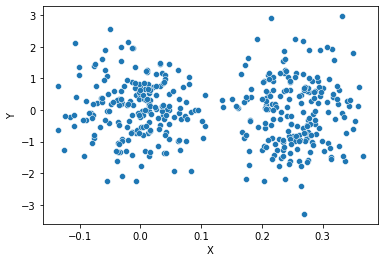

In [ ]:
drawScatter("First", df1)

Center-Based Clustering: \\

-  A cluster is a set of objects such that an object in a cluster is closer (more similar) to the “center” of a cluster, than to the center of any other cluster.
- The center of a cluster is often a centroid, the average of all the points in the cluster, or a medoid, the most “representative” point of a cluster.

Number of clusters: $K=2$

========== Results for k=2 ==========
 
The centers are: [[ 0.11927991  0.71182715]
 [ 0.13013541 -0.87919281]]
 
The SEE is: 146.8885600533514
 
The average silhouette_score is : 0.5362906097948957


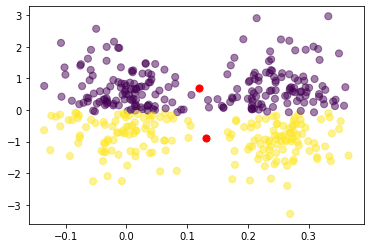

========== Results for k=3 ==========
 
The centers are: [[ 0.12096253  1.26307915]
 [ 0.15170482 -1.18531547]
 [ 0.10859584  0.08671815]]
 
The SEE is: 80.74148881477217
 
The average silhouette_score is : 0.493438919978942


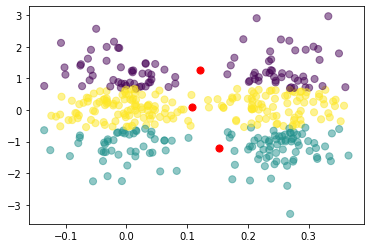

========== Results for k=4 ==========
 
The centers are: [[ 0.1189762   0.48872308]
 [ 0.1086951  -0.35689702]
 [ 0.15587199 -1.35548058]
 [ 0.12076945  1.55845317]]
 
The SEE is: 53.830170398992365
 
The average silhouette_score is : 0.45701663665216075


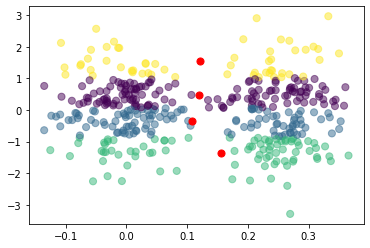

========== Results for k=5 ==========
 
The centers are: [[ 0.1346198   0.8057156 ]
 [ 0.15179319 -1.60716515]
 [ 0.1137899   1.86158695]
 [ 0.14201663 -0.75565704]
 [ 0.09454005  0.05805135]]
 
The SEE is: 37.99467865220195
 
The average silhouette_score is : 0.4542832471217125


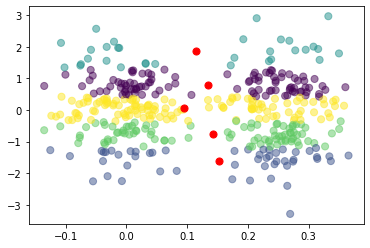

========== Results for k=6 ==========
 
The centers are: [[ 0.11070347  1.00762343]
 [ 0.13766636 -0.98281724]
 [ 0.17505496 -1.79281633]
 [ 0.10220476 -0.26459823]
 [ 0.1508848   2.00815834]
 [ 0.11971843  0.34951191]]
 
The SEE is: 29.932506638530953
 
The average silhouette_score is : 0.4278029272890157


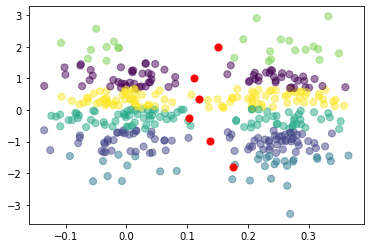

In [ ]:
doKmeans(6, df1)

In [ ]:
SSE_df1 = findElbow(df1)

Elbow point: 3
SSE for this point is:  53.82732990087291


<Figure size 360x360 with 0 Axes>

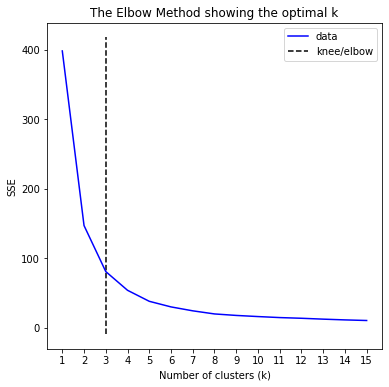

In [ ]:
plotElbow(SSE_df1)

========== Results for k=2 ==========
 
The centers are:
[[ 0.11843403  0.72453026]
 [ 0.13756588 -0.89394164]]
 
Number of datapoints belonging to more than one cluster= 0
 
Validation Metrics:
pc= 0.4082276761379846
pec= 0.2181645887875697
The average silhouette_score is : 0.5362906097948957


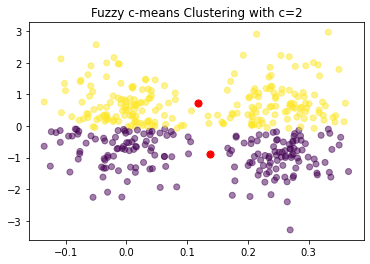

========== Results for k=3 ==========
 
The centers are:
[[ 0.10425992  0.10045201]
 [ 0.15276675 -1.16872608]
 [ 0.12101082  1.24375147]]
 
Number of datapoints belonging to more than one cluster= 16
 
Validation Metrics:
pc= 0.2497118453725481
pec= 0.21850573499000595
The average silhouette_score is : 0.17610542665539533


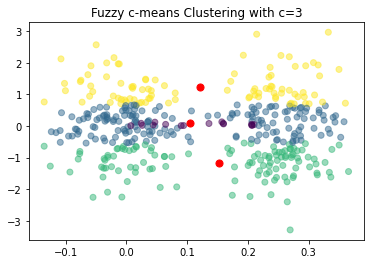

========== Results for k=4 ==========
 
The centers are:
[[ 0.10752936 -0.39438752]
 [ 0.11489474  1.55135126]
 [ 0.11942287  0.47412414]
 [ 0.15991571 -1.37831721]]
 
Number of datapoints belonging to more than one cluster= 12
 
Validation Metrics:
pc= 0.17335122398378033
pec= 0.21103327064046573
The average silhouette_score is : 0.3664131510876528


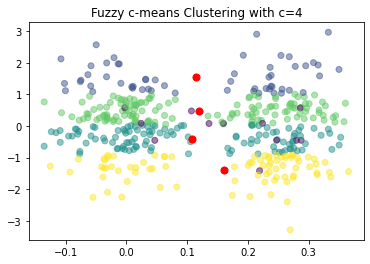

========== Results for k=5 ==========
 
The centers are:
[[ 0.16291972 -1.53859177]
 [ 0.09366274  0.0961447 ]
 [ 0.13676318 -0.71761901]
 [ 0.13095261  1.86905979]
 [ 0.12843943  0.81323212]]
 
Number of datapoints belonging to more than one cluster= 41
 
Validation Metrics:
pc= 0.1341689903486039
pec= 0.1888944309443311
The average silhouette_score is : 0.31564305713684776


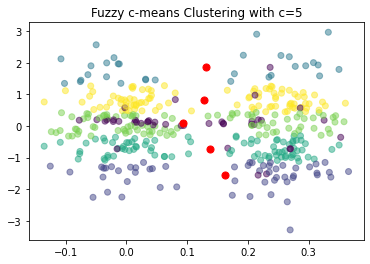

========== Results for k=6 ==========
 
The centers are:
[[ 0.11068375  0.33302641]
 [ 0.14037987  1.97357671]
 [ 0.08937915 -0.25792355]
 [ 0.17241695 -1.66603809]
 [ 0.16020665 -0.93346086]
 [ 0.1241742   0.98483717]]
 
Number of datapoints belonging to more than one cluster= 76
 
Validation Metrics:
pc= 0.10566020178976457
pec= 0.17886667575500878
The average silhouette_score is : 0.1945925708153659


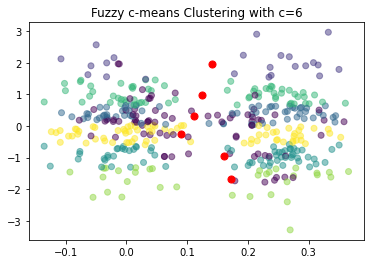

In [ ]:
pcs1 = []
for c in range(2, 7):
  pc = doFuzzy(df1, num_of_clusters=c, membership_cutoff=0.001, n_jobs=200)
  pcs1.append(pc)

Maximum fuzzy partition coefficient(FPC)=0.4082276761379846 for c=2


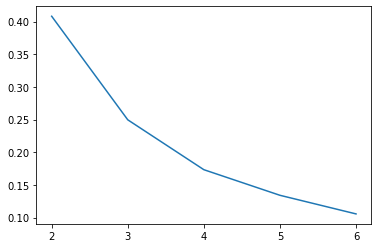

In [ ]:
print("Maximum fuzzy partition coefficient(FPC)={} for c={}".format(max(pcs1), pcs1.index(max(pcs1))+2))
plt.plot(range(2, 7), pcs1)
plt.xticks(np.arange(2, 7, step=1))
plt.show()

Knee point: 0.43652018406591486


<Figure size 360x360 with 0 Axes>

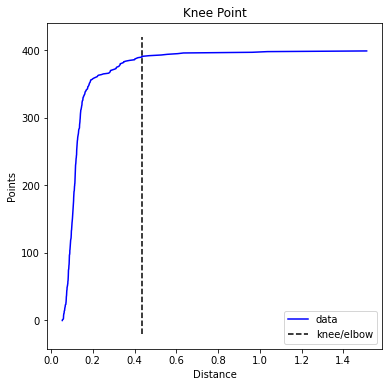

========== Results for eps=0.43652018406591486 ==========
 
Estimated number of clusters: 1
Estimated number of noise points: 27
 
The average silhouette_score is: 0.516


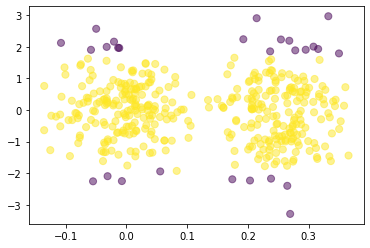

In [ ]:
paraTuningDBSCAN(df1, "interp1d", 50)

#### **2.2. Second Dataset**

Scatter plot for the Second dataset:


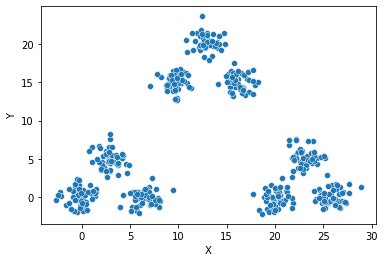

In [ ]:
drawScatter("Second", df2)

Density-based Clustering:
- A cluster is a dense region of points, which is separated by low- density regions, from other regions of high density.
- Used when the clusters are irregular or intertwined, and when noise and outliers are present.

Number of clusters: $K=3$ or $9$ 

========== Results for k=2 ==========
 
The centers are: [[ 7.96561081  9.21502853]
 [22.98988192  1.62558656]]
 
The SEE is: 31124.19663634056
 
The average silhouette_score is : 0.510043652072989


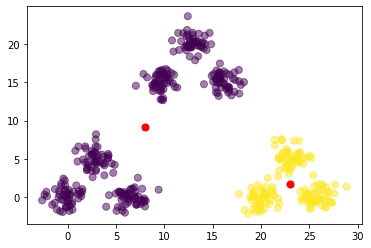

========== Results for k=3 ==========
 
The centers are: [[ 3.03019658  1.61465616]
 [22.98988192  1.62558656]
 [12.90102504 16.8154009 ]]
 
The SEE is: 6487.0045262632075
 
The average silhouette_score is : 0.7240379233766401


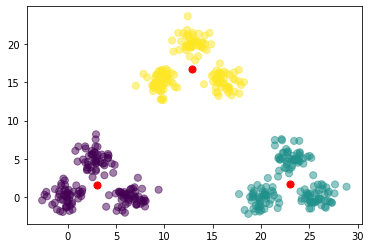

========== Results for k=4 ==========
 
The centers are: [[ 1.30948949  2.48588738]
 [12.90102504 16.8154009 ]
 [ 6.47161078 -0.12780626]
 [22.98988192  1.62558656]]
 
The SEE is: 5371.041505309997
 
The average silhouette_score is : 0.641148939502236


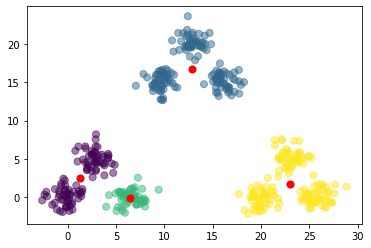

========== Results for k=5 ==========
 
The centers are: [[22.98988192  1.62558656]
 [ 9.65835456 15.08826824]
 [ 6.47161078 -0.12780626]
 [14.52236028 17.67896722]
 [ 1.30948949  2.48588738]]
 
The SEE is: 4358.69907691654
 
The average silhouette_score is : 0.5700142407916128


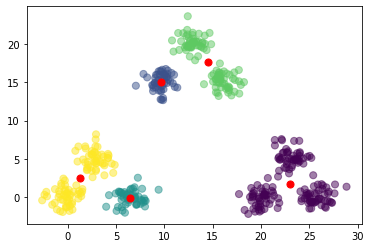

========== Results for k=6 ==========
 
The centers are: [[14.52236028 17.67896722]
 [23.11473144  5.10854081]
 [ 9.65835456 15.08826824]
 [ 1.30948949  2.48588738]
 [ 6.47161078 -0.12780626]
 [22.92745716 -0.11589057]]
 
The SEE is: 3447.7072471093534
 
The average silhouette_score is : 0.49331683106610574


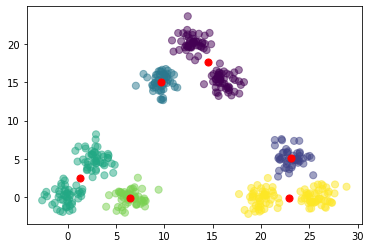

========== Results for k=7 ==========
 
The centers are: [[12.90964167 20.21423962]
 [16.13507889 15.14369483]
 [ 9.65835456 15.08826824]
 [ 1.30948949  2.48588738]
 [20.02738714 -0.22284562]
 [ 6.47161078 -0.12780626]
 [24.47112931  2.54980265]]
 
The SEE is: 2541.371565683621
 
The average silhouette_score is : 0.5650128357224193


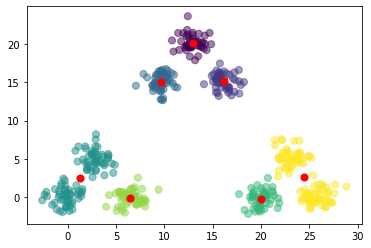

========== Results for k=8 ==========
 
The centers are: [[25.81913993  0.04673579]
 [ 6.47161078 -0.12780626]
 [16.13507889 15.14369483]
 [23.06809785  5.1550355 ]
 [ 9.65835456 15.08826824]
 [12.90964167 20.21423962]
 [20.02738714 -0.22284562]
 [ 1.30948949  2.48588738]]
 
The SEE is: 1700.1342337556189
 
The average silhouette_score is : 0.6341044460116986


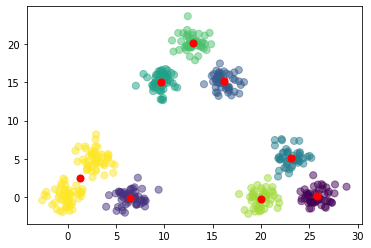

========== Results for k=9 ==========
 
The centers are: [[12.90964167 20.21423962]
 [25.81913993  0.04673579]
 [16.13507889 15.14369483]
 [-0.23091099  0.02934982]
 [ 6.47161078 -0.12780626]
 [ 9.65835456 15.08826824]
 [20.02738714 -0.22284562]
 [23.06809785  5.1550355 ]
 [ 2.84988997  4.94242493]]
 
The SEE is: 859.3931951407192
 
The average silhouette_score is : 0.6925519321164127


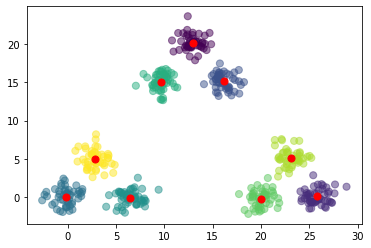

========== Results for k=10 ==========
 
The centers are: [[12.90964167 20.21423962]
 [ 9.65835456 15.08826824]
 [ 6.47161078 -0.12780626]
 [23.06809785  5.1550355 ]
 [ 2.58729553  5.88169118]
 [20.02738714 -0.22284562]
 [-0.23091099  0.02934982]
 [ 3.09228483  4.07540993]
 [16.13507889 15.14369483]
 [25.81913993  0.04673579]]
 
The SEE is: 815.4927216725604
 
The average silhouette_score is : 0.6480890332990465


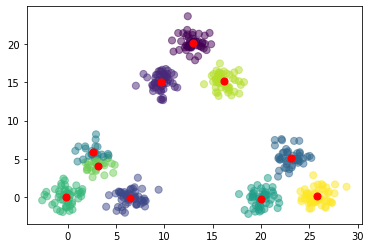

In [ ]:
doKmeans(10, df2)

In [ ]:
SSE_df2 = findElbow(df2)

Elbow point: 3
SSE for this point is:  5371.041505309997


<Figure size 360x360 with 0 Axes>

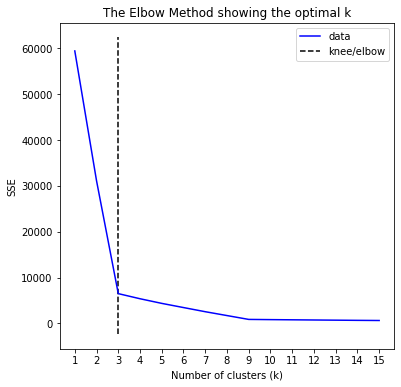

In [ ]:
plotElbow(SSE_df2)

Has two elbows! So the best $k$ is either the one on the first elbow which is $3$ or the one on the second elbow which is $9$. 

========== Results for k=2 ==========
 
The centers are:
[[ 5.52174262  6.01312285]
 [21.02361847  4.82320456]]
 
Number of datapoints belonging to more than one cluster= 0
 
Validation Metrics:
pc= 0.3721728672727179
pec= 0.2892805736386692
The average silhouette_score is : 0.4400035130819573


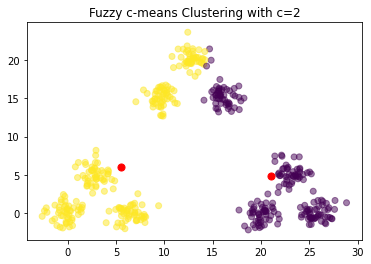

========== Results for k=3 ==========
 
The centers are:
[[ 2.94692748  1.63257103]
 [23.01244543  1.58299326]
 [12.90384001 16.89543729]]
 
Number of datapoints belonging to more than one cluster= 40
 
Validation Metrics:
pc= 0.28553731112221176
pec= 0.1500207190686876
The average silhouette_score is : 0.5441503938639852


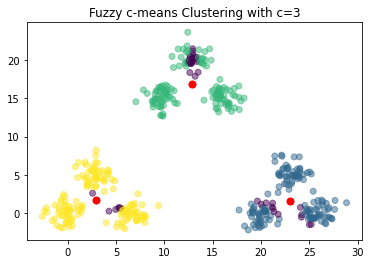

========== Results for k=4 ==========
 
The centers are:
[[23.06760887  1.45407281]
 [ 2.86911185  1.52330525]
 [10.2107555  15.8391191 ]
 [15.2553809  16.45509729]]
 
Number of datapoints belonging to more than one cluster= 99
 
Validation Metrics:
pc= 0.19317623440142528
pec= 0.17046046857603053
The average silhouette_score is : 0.3234998654628582


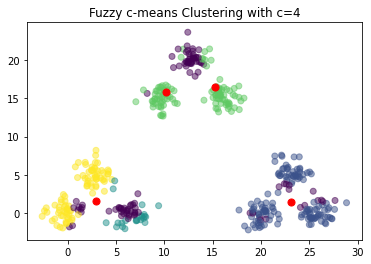

========== Results for k=5 ==========
 
The centers are:
[[23.19437623  1.45824426]
 [ 0.83091353  1.72749663]
 [15.66936134 15.73572958]
 [10.70029593 16.77432647]
 [ 6.20302115  0.40694677]]
 
Number of datapoints belonging to more than one cluster= 170
 
Validation Metrics:
pc= 0.154546757457844
pec= 0.14821259362345013
The average silhouette_score is : 0.11616071879586662


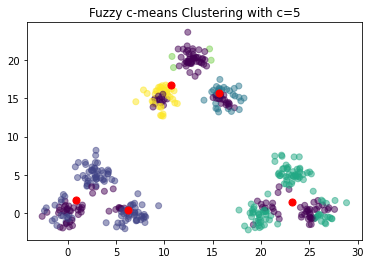

========== Results for k=6 ==========
 
The centers are:
[[ 1.39688162e+01  1.85392113e+01]
 [ 2.60938190e+00  1.57929870e+00]
 [ 1.98041341e+01 -1.88861441e-01]
 [ 1.01095649e+01  1.50341268e+01]
 [ 2.29581767e+01  5.20392286e+00]
 [ 2.56788967e+01  3.55970801e-03]]
 
Number of datapoints belonging to more than one cluster= 270
 
Validation Metrics:
pc= 0.12394706717316206
pec= 0.13662827027064256
The average silhouette_score is : -0.17199879812800842


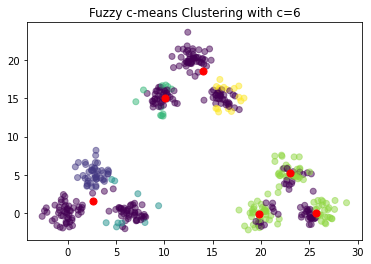

========== Results for k=7 ==========
 
The centers are:
[[ 1.02163943e+01  1.51201283e+01]
 [ 2.57412235e+01  1.55899461e-03]
 [ 6.02989573e+00  5.11321992e-01]
 [ 1.38490137e+01  1.87901975e+01]
 [ 2.30369604e+01  5.23014609e+00]
 [ 5.87968954e-01  1.38251616e+00]
 [ 1.99819083e+01 -1.77631125e-01]]
 
Number of datapoints belonging to more than one cluster= 345
 
Validation Metrics:
pc= 0.10991611191990466
pec= 0.11216436556206952
The average silhouette_score is : -0.40110197868135894


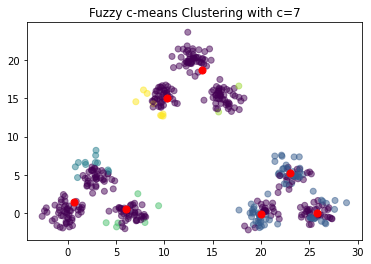

========== Results for k=8 ==========
 
The centers are:
[[ 2.42974249e+01 -1.32982225e-01]
 [ 9.68479297e+00  1.51163823e+01]
 [ 6.55333249e+00 -1.05747298e-01]
 [ 2.27548446e+01  4.35874612e+00]
 [-1.89277124e-01 -1.06888304e-02]
 [ 1.61111839e+01  1.51044593e+01]
 [ 2.85866734e+00  4.94524529e+00]
 [ 1.29327376e+01  2.01972452e+01]]
 
Number of datapoints belonging to more than one cluster= 395
 
Validation Metrics:
pc= 0.09540394369801365
pec= 0.09800597372190825
The average silhouette_score is : -0.5542585802440843


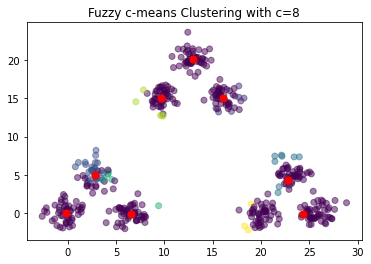

========== Results for k=9 ==========
 
The centers are:
[[12.9341823  20.2101901 ]
 [25.7571188  -0.03376178]
 [16.08222523 15.13567547]
 [ 9.22156232 13.6185359 ]
 [23.11299765  5.11054723]
 [ 9.80379585 15.65495411]
 [ 6.05228873  0.45419799]
 [19.99542992 -0.22652947]
 [ 0.37044967  1.00049141]]
 
Number of datapoints belonging to more than one cluster= 433
 
Validation Metrics:
pc= 0.08917283615930664
pec= 0.07639351985611809
The average silhouette_score is : -0.5857697571111562


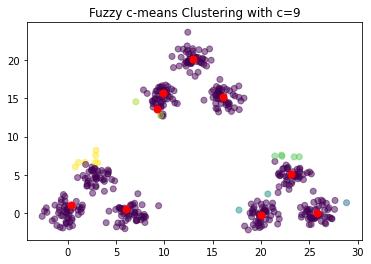

In [ ]:
pcs2 = []
for c in range(2, 10):
  pc = doFuzzy(df2, num_of_clusters=c, membership_cutoff=0.001, n_jobs=200)
  pcs2.append(pc)

Maximum fuzzy partition coefficient(FPC)=0.3721728672727179 for c=2


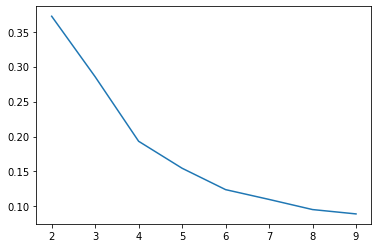

In [ ]:
print("Maximum fuzzy partition coefficient(FPC)={} for c={}".format(max(pcs2), pcs2.index(max(pcs2))+2))
plt.plot(range(2, 10), pcs2)
plt.xticks(np.arange(2, 10, step=1))
plt.show()

Knee point: 1.3242966586518992


<Figure size 360x360 with 0 Axes>

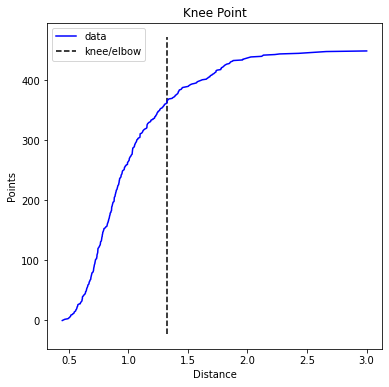

========== Results for eps=1.3242966586518992 ==========
 
Estimated number of clusters: 9
Estimated number of noise points: 29
 
The average silhouette_score is: 0.617


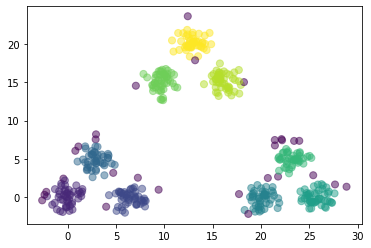

In [ ]:
paraTuningDBSCAN(df2, "polynomial", 20)

#### **2.3. Third Dataset**

Scatter plot for the Third dataset:


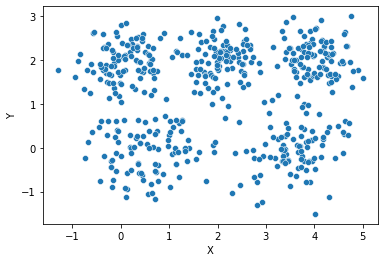

In [ ]:
drawScatter("Third", df3)

Center-Based Clustering: \\

-  A cluster is a set of objects such that an object in a cluster is closer (more similar) to the “center” of a cluster, than to the center of any other cluster.
- The center of a cluster is often a centroid, the average of all the points in the cluster, or a medoid, the most “representative” point of a cluster.

Number of clusters: $K=5$

========== Results for k=2 ==========
 
The centers are: [[3.39239392 1.31385597]
 [0.48380267 1.08634282]]
 
The SEE is: 908.1713254614046
 
The average silhouette_score is : 0.4597651234688414


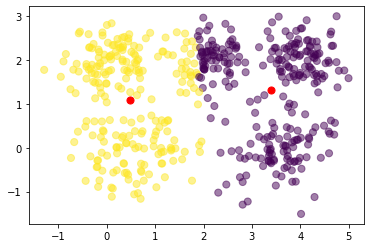

========== Results for k=3 ==========
 
The centers are: [[ 3.51234268 -0.05959744]
 [ 3.18284014  2.0515819 ]
 [ 0.38191052  1.04913832]]
 
The SEE is: 623.0383491955092
 
The average silhouette_score is : 0.4572516913124048


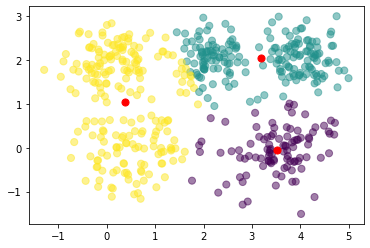

========== Results for k=4 ==========
 
The centers are: [[ 3.5814641  -0.05524424]
 [ 0.57342595 -0.08077537]
 [ 0.37280295  1.95287484]
 [ 3.25903593  2.04223764]]
 
The SEE is: 398.3947934114801
 
The average silhouette_score is : 0.4725999045087266


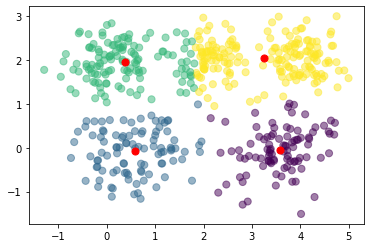

========== Results for k=5 ==========
 
The centers are: [[ 0.07190087  1.95680378]
 [ 3.5799822  -0.06140016]
 [ 0.55990885 -0.0918281 ]
 [ 2.07110263  1.99524376]
 [ 4.02196517  2.0381927 ]]
 
The SEE is: 222.36598776929088
 
The average silhouette_score is : 0.5604142087131664


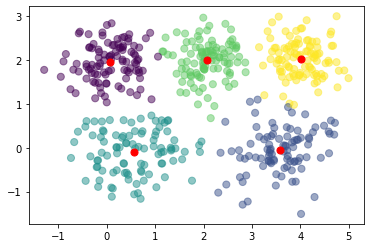

========== Results for k=6 ==========
 
The centers are: [[ 1.3190934   0.10321736]
 [ 2.07034875  2.00804262]
 [ 4.02587268  2.05882534]
 [ 0.06354289  1.96513115]
 [ 0.17062224 -0.19507771]
 [ 3.62479519 -0.0344875 ]]
 
The SEE is: 193.95255601125345
 
The average silhouette_score is : 0.5273614457298591


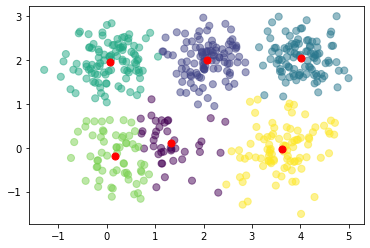

In [ ]:
doKmeans(6, df3)

In [ ]:
SSE_df3 = findElbow(df3)

Elbow point: 5
SSE for this point is:  193.95255601125345


<Figure size 360x360 with 0 Axes>

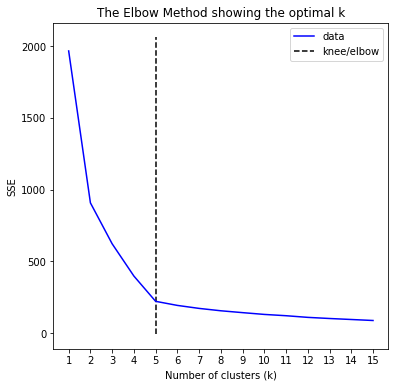

In [ ]:
plotElbow(SSE_df3)

========== Results for k=2 ==========
 
The centers are:
[[3.52642712 1.29544553]
 [0.55397369 1.16510546]]
 
Number of datapoints belonging to more than one cluster= 1
 
Validation Metrics:
pc= 0.37577738365859525
pec= 0.28767695410892163
The average silhouette_score is : 0.04306095312144119


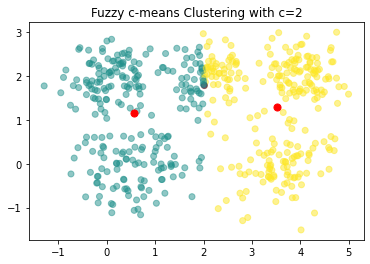

========== Results for k=3 ==========
 
The centers are:
[[3.85924438 1.12380004]
 [0.34506042 0.59517859]
 [1.83842747 1.93793051]]
 
Number of datapoints belonging to more than one cluster= 18
 
Validation Metrics:
pc= 0.22093355795279165
pec= 0.2914701730661528
The average silhouette_score is : 0.26663550555679877


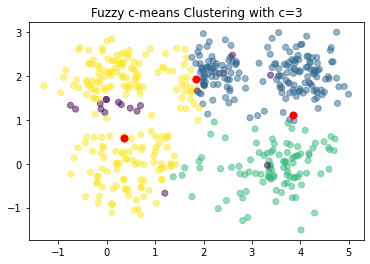

========== Results for k=4 ==========
 
The centers are:
[[ 3.68837315  2.05189993]
 [ 0.38520281  1.98772896]
 [ 0.5841365  -0.00887586]
 [ 3.53818215  0.02297525]]
 
Number of datapoints belonging to more than one cluster= 40
 
Validation Metrics:
pc= 0.16588095283872606
pec= 0.2381701270309506
The average silhouette_score is : 0.36517073405482386


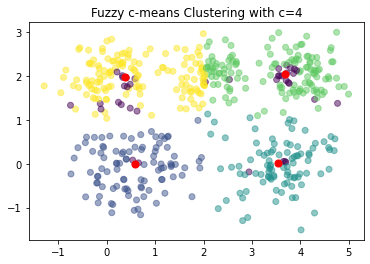

========== Results for k=5 ==========
 
The centers are:
[[ 0.06834562  1.95725167]
 [ 0.50863306 -0.13288546]
 [ 4.03152359  2.02508995]
 [ 3.58564321 -0.07948172]
 [ 2.08410477  1.9957516 ]]
 
Number of datapoints belonging to more than one cluster= 138
 
Validation Metrics:
pc= 0.13884130498247882
pec= 0.18775081180861686
The average silhouette_score is : 0.1856238706658591


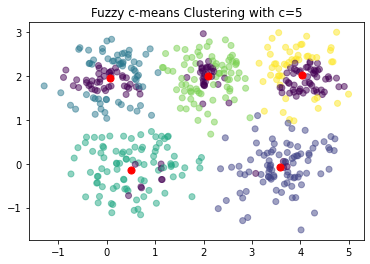

========== Results for k=6 ==========
 
The centers are:
[[ 3.1255344  -0.21684614]
 [ 3.8921635   0.16619845]
 [ 0.06255255  1.96758426]
 [ 0.44454922 -0.12483471]
 [ 4.02535243  2.07004801]
 [ 2.06912991  2.0194345 ]]
 
Number of datapoints belonging to more than one cluster= 165
 
Validation Metrics:
pc= 0.10884292631059996
pec= 0.18174803892458496
The average silhouette_score is : 0.09513404390739028


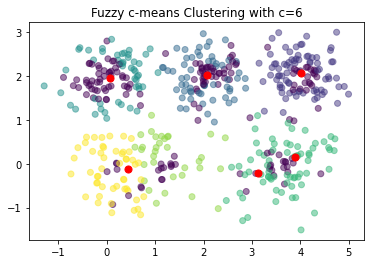

In [ ]:
pcs3 = []
for c in range(2, 7):
  pc = doFuzzy(df3, num_of_clusters=c, membership_cutoff=0.001, n_jobs=200)
  pcs3.append(pc)

Maximum fuzzy partition coefficient(FPC)=0.37577738365859525 for c=2


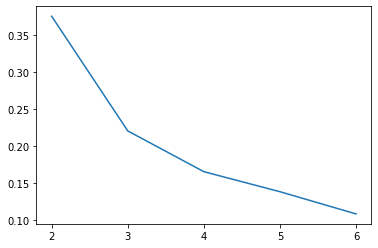

In [ ]:
print("Maximum fuzzy partition coefficient(FPC)={} for c={}".format(max(pcs3), pcs3.index(max(pcs3))+2))
plt.plot(range(2, 7), pcs3)
plt.xticks(np.arange(2, 7, step=1))
plt.show()

Knee point: 0.46897178961964403


<Figure size 360x360 with 0 Axes>

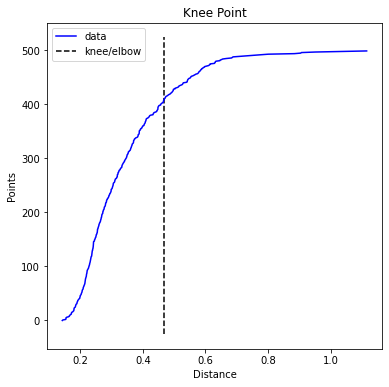

========== Results for eps=0.46897178961964403 ==========
 
Estimated number of clusters: 5
Estimated number of noise points: 45
 
The average silhouette_score is: 0.501


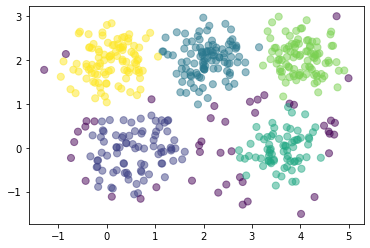

In [ ]:
paraTuningDBSCAN(df3, "polynomial", 20)

## **3. Conclusion**

Explained in the report file. 

#### **3.1. Lloyd's k-means Clustering with Elbow Method**

#### **3.2. Fuzzy C-Means Clustering**

#### **3.3. DBSCAN Clustering**